In [17]:
import numpy as np
import SimpleITK as sitk

import itkwidgets
from itkwidgets import view

%matplotlib inline
import matplotlib.pyplot as plt

def compare_overlay(moving, fixed):
    farr = sitk.GetArrayFromImage(fixed).astype(np.float32)
    rarr = sitk.GetArrayFromImage(moving).astype(np.float32)

    plt.figure()
    plt.imshow(farr, 'gray', interpolation='none', alpha=0.8)
    plt.imshow(rarr, 'winter', interpolation='none', alpha=0.5)

In [2]:
movingImage = sitk.ReadImage('sampleImages/ct_2d_moving.tif')
fixedImage  = sitk.ReadImage('sampleImages/mri_2d.tif')

In [3]:
itkwidgets.compare(movingImage,fixedImage)

AppLayout(children=(HBox(children=(Label(value='Link:'), Checkbox(value=False, description='cmap'), Checkbox(v…

In [4]:
itkwidgets.checkerboard(movingImage,fixedImage, pattern=8)

In [5]:
params = sitk.ReadParameterFile('elastixParameters/AffineMSE_2d.txt')
sitk.PrintParameterMap( params )

ParameterObject (0x559688cf6d90)
  RTTI typeinfo:   elastix::ParameterObject
  Reference Count: 1
  Modified Time: 1087
  Debug: Off
  Object Name: 
  Observers: 
    none
ParameterMap 0: 
  (BSplineInterpolationOrder 1)
  (DefaultPixelValue 0)
  (ErodeMask "false")
  (FinalBSplineInterpolationOrder 3)
  (FixedImageDimension 2)
  (FixedImagePyramid "FixedRecursiveImagePyramid")
  (FixedInternalImagePixelType "float")
  (HowToCombineTransforms "Compose")
  (ImageSampler "Random")
  (Interpolator "BSplineInterpolator")
  (MaximumNumberOfIterations 1000)
  (Metric "AdvancedMeanSquares")
  (MovingImageDimension 2)
  (MovingImagePyramid "MovingRecursiveImagePyramid")
  (MovingInternalImagePixelType "float")
  (NewSamplesEveryIteration "true")
  (NumberOfResolutions 4)
  (NumberOfSpatialSamples 2048)
  (Optimizer "AdaptiveStochasticGradientDescent")
  (Registration "MultiResolutionRegistration")
  (ResampleInterpolator "FinalBSplineInterpolator")
  (Resampler "DefaultResampler")
  (ResultIma

In [6]:
elastixImageFilter = sitk.ElastixImageFilter()
elastixImageFilter.SetParameterMap(params)
elastixImageFilter.SetFixedImage(fixedImage)
elastixImageFilter.SetMovingImage(movingImage)
elastixImageFilter.Execute()
transformedMovingImage = elastixImageFilter.GetResultImage()

Installing all components.
InstallingComponents was successful.

ELASTIX version: 5.000
Command line options from ElastixBase:
-fMask    unspecified, so no fixed mask used
-mMask    unspecified, so no moving mask used
-out      ./
-threads  unspecified, so all available threads are used
Command line options from TransformBase:
-t0       unspecified, so no initial transform used

Reading images...
Reading images took 0 ms.

  A default pyramid schedule is used.
  A default pyramid schedule is used.
  The default value "false" is used instead.
  The default value "GeometricalCenter" is used instead.
Transform parameters are initialized as: [1, 0, 0, 1, 0, 0]
InitializeTransform took 0.00s
  The default value "false" is used instead.
Scales for transform parameters are: [100000, 100000, 100000, 100000, 1, 1]
Initialization of all components (before registration) took: 0 ms.
Preparation of the image pyramids took: 24 ms.

Resolution: 0
  The default value "false" is used instead.
  The def

513	1939.893639	1.038436	0.009677	15.830916	0.3
514	1916.747490	0.870443	0.009751	13.010046	0.3
515	1918.891503	0.702449	0.009827	14.419859	0.3
516	1882.645588	0.534455	0.009903	20.338071	0.3
517	1873.137778	0.366952	0.009981	8.145594	0.3
518	1928.319159	0.198958	0.010060	16.176518	0.3
519	1948.209462	0.030965	0.010140	14.784957	0.3
520	2110.662871	0.000000	0.010155	14.863689	0.3
521	2076.918377	0.000000	0.010155	14.913020	0.3
522	1949.446417	0.000000	0.010155	6.242626	0.3
523	2038.919120	0.000000	0.010155	12.156903	0.3
524	1861.969776	0.000000	0.010155	12.863283	0.3
525	1887.952077	0.000000	0.010155	23.805768	0.3
526	1994.414393	0.000000	0.010155	12.942841	0.3
527	1755.344341	0.000000	0.010155	12.531182	0.3
528	1978.306401	0.000000	0.010155	9.632984	0.3
529	1892.265753	0.000000	0.010155	16.994611	0.3
530	1836.536005	0.000000	0.010155	21.748443	0.3
531	1996.854041	0.000000	0.010155	17.001866	0.3
532	1915.522349	0.000000	0.010155	12.954687	0.3
533	1917.626991	0.000000	0.010155	11.012531

134	2081.587924	1.999765	0.011247	8.833666	0.3
135	1768.029349	1.243716	0.011630	9.674012	0.3
136	1883.441989	2.123659	0.011187	23.606631	0.3
137	1939.301798	3.123648	0.010723	9.318570	0.3
138	1742.620444	2.360725	0.011073	14.950264	0.3
139	1745.333477	1.597824	0.011447	9.802280	0.3
140	1724.465276	0.834899	0.011847	11.406290	0.3
141	1778.434479	0.092187	0.012264	7.720572	0.3
142	1755.216499	0.000000	0.012318	7.130713	0.3
143	1649.344263	0.000000	0.012318	13.578616	0.3
144	2031.736077	0.000000	0.012318	11.073576	0.3
145	1977.341611	0.000000	0.012318	16.349852	0.3
146	1849.621390	0.995303	0.011761	7.231832	0.3
147	1909.401785	1.994896	0.011250	8.423025	0.3
148	1771.378015	1.685130	0.011403	12.219272	0.3
149	1872.086373	0.922249	0.011800	11.572025	0.3
150	1843.473622	0.165654	0.012222	13.949500	0.3
151	1827.212502	0.000000	0.012318	7.273853	0.3
152	1720.572170	0.640911	0.011954	7.131366	0.3
153	1907.783702	1.015285	0.011750	7.813952	0.3
154	1939.749142	0.279034	0.012157	10.715672	0.3
155

799	1847.046066	17.967465	0.006638	9.423296	0.3
800	1674.525428	17.290209	0.006756	11.640750	0.3
801	1726.590262	16.527322	0.006893	9.741369	0.3
802	1900.028099	15.764420	0.007036	16.616787	0.3
803	1640.295958	16.764420	0.006850	8.833306	0.3
804	1883.155213	17.371208	0.006742	7.285792	0.3
805	1608.754126	16.798846	0.006844	10.460330	0.3
806	1884.369203	16.397847	0.006917	9.964307	0.3
807	1766.440515	15.800079	0.007029	9.171543	0.3
808	1786.572992	16.770506	0.006849	8.555352	0.3
809	1550.837048	16.017140	0.006988	5.280048	0.3
810	1763.477481	16.414749	0.006914	5.353584	0.3
811	1649.116145	16.767783	0.006849	8.922556	0.3
812	1814.803684	16.040223	0.006984	10.704964	0.3
813	1807.007320	15.372271	0.007112	8.740023	0.3
814	1837.529191	14.646156	0.007257	10.640915	0.3
815	1729.070863	13.891699	0.007414	7.641994	0.3
816	1745.367790	14.878519	0.007210	6.135979	0.3
817	1765.156815	15.842207	0.007021	5.914478	0.3
818	1900.000145	16.757609	0.006851	9.062591	0.3
819	1684.312865	17.458377	0.006726	

402	1851.167201	15.908377	0.003387	8.211394	0.3
403	1804.862645	14.943291	0.003478	11.748153	0.3
404	1784.776237	13.979926	0.003574	18.646506	0.3
405	1832.487132	13.014828	0.003675	16.409870	0.3
406	1790.408511	14.014828	0.003570	19.344731	0.3
407	1953.489075	15.014828	0.003471	9.957968	0.3
408	2073.699115	16.014824	0.003377	11.779119	0.3
409	1828.248217	17.014777	0.003289	9.617903	0.3
410	2017.130692	16.061553	0.003373	9.515887	0.3
411	1817.858400	16.874165	0.003301	9.834701	0.3
412	2017.196444	17.871680	0.003216	15.115739	0.3
413	1917.923269	16.906576	0.003298	20.041061	0.3
414	1816.895671	17.878872	0.003216	13.621729	0.3
415	1968.466306	17.233350	0.003270	13.136659	0.3
416	1829.784303	16.268504	0.003354	9.555805	0.3
417	1879.777235	15.303406	0.003444	24.705431	0.3
418	1690.328556	14.338302	0.003538	18.106407	0.3
419	1728.361123	15.338302	0.003440	18.038307	0.3
420	1906.005024	16.338302	0.003348	16.360845	0.3
421	1772.248814	17.338300	0.003261	11.920629	0.3
422	1872.824165	16.373196	

  The default value "false" is used instead.
  The default value "100000" is used instead.
  The default value "1" is used instead.
  The default value "1" is used instead.
  The default value "20" is used instead.
  The default value "0" is used instead.
  The default value "0" is used instead.
  The default value "192" is used instead.
  The default value "10" is used instead.
  The default value "true" is used instead.
  The default value "true" is used instead.
  The default value "false" is used instead.
  The default value "1" is used instead.
  The default value "1" is used instead.
  The default value "0" is used instead.
  The default value "1000" is used instead.
  The default value "100000" is used instead.
  The default value "0.1" is used instead.
Elastix initialization of all components (for this resolution) took: 0 ms.
Initialization of AdvancedMeanSquares metric took: 12 ms.
Starting automatic parameter estimation for AdaptiveStochasticGradientDescent ...
  The default 

534	1753.947038	22.764223	0.001239	18.255076	0.3
535	1964.648222	21.966162	0.001262	10.649955	0.3
536	1702.302216	20.985425	0.001291	8.488656	0.4
537	1917.384606	21.629730	0.001272	15.171736	0.3
538	1855.666870	22.533759	0.001245	14.965322	0.3
539	1780.320781	23.506100	0.001218	19.841567	0.3
540	1985.636041	23.946324	0.001206	11.775169	0.4
541	1926.440367	24.946318	0.001180	8.300500	0.3
542	1985.325786	25.938163	0.001155	14.038549	0.3
543	1920.829536	26.916564	0.001132	7.931569	0.3
544	1990.185959	26.029325	0.001153	19.555029	0.3
545	1816.311852	26.972003	0.001130	13.896104	0.3
546	1873.942395	27.927865	0.001108	21.090025	0.3
547	1913.838358	28.927775	0.001086	17.658186	0.3
548	1803.035859	28.378420	0.001098	10.012488	0.3
549	1754.780597	27.398053	0.001120	9.809400	0.3
550	1825.135617	26.804321	0.001134	8.045814	0.3
551	1800.948160	25.991576	0.001154	25.074382	0.3
552	1941.584126	26.702133	0.001137	21.134814	0.3
553	1787.324969	27.702133	0.001113	25.954741	0.4
554	1940.963238	26.721326


Final metric value  = 1688.960155
Settings of AdaptiveStochasticGradientDescent for all resolutions:
( SP_a 0.213260 0.258685 0.125017 0.054220 )
( SP_A 20.000000 20.000000 20.000000 20.000000 )
( SP_alpha 1.000000 1.000000 1.000000 1.000000 )
( SigmoidMax 1.000000 1.000000 1.000000 1.000000 )
( SigmoidMin -0.167994 -0.762927 -0.965104 -0.980807 )
( SigmoidScale 8.139979 7.382771 4.456921 8.895577 )



In [8]:
# timg = sitk.Image(transformedMovingImage)
# fimg = sitk.Image(fixedImage)

In [11]:
# itkwidgets.checkerboard(transformedMovingImage,fixedImage, pattern=8)

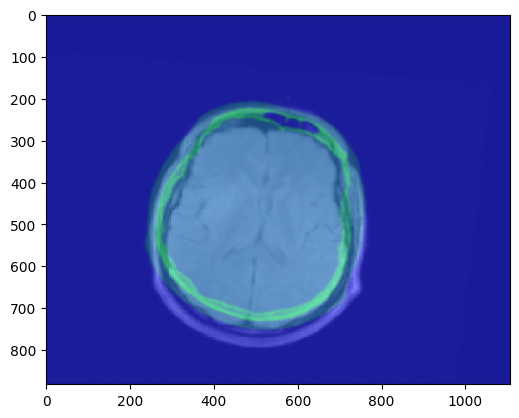

In [18]:
compare_overlay(transformedMovingImage, fixedImage)

In [19]:
paramsMI = sitk.ReadParameterFile('elastixParameters/AffineMSE_2d.txt')
sitk.PrintParameterMap( paramsMI )

Time spent on saving the results, applying the final transform etc.: 45 ms.
ParameterObject (0x55968b0d36d0)
  RTTI typeinfo:   elastix::ParameterObject
  Reference Count: 1
  Modified Time: 126829
  Debug: Off
  Object Name: 
  Observers: 
    none
ParameterMap 0: 
  (BSplineInterpolationOrder 1.000000)
  (DefaultPixelValue 0.000000)
  (ErodeMask "false")
  (FinalBSplineInterpolationOrder 3.000000)
  (FixedImageDimension 2.000000)
  (FixedImagePyramid "FixedRecursiveImagePyramid")
  (FixedInternalImagePixelType "float")
  (HowToCombineTransforms "Compose")
  (ImageSampler "Random")
  (Interpolator "BSplineInterpolator")
  (MaximumNumberOfIterations 1000.000000)
  (Metric "AdvancedMeanSquares")
  (MovingImageDimension 2.000000)
  (MovingImagePyramid "MovingRecursiveImagePyramid")
  (MovingInternalImagePixelType "float")
  (NewSamplesEveryIteration "true")
  (NumberOfResolutions 4.000000)
  (NumberOfSpatialSamples 2048.000000)
  (Optimizer "AdaptiveStochasticGradientDescent")
  (Registr

In [ ]:
elastixImageFilter = sitk.ElastixImageFilter()
elastixImageFilter.SetParameterMap(params)
elastixImageFilter.SetFixedImage(fixedImage)
elastixImageFilter.SetMovingImage(movingImage)
elastixImageFilter.Execute()
transformedMovingImage = elastixImageFilter.GetResultImage()